In [102]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Loading Dataset

In [2]:
X = np.loadtxt('train_X_1000.csv', delimiter = ',')
Y = np.loadtxt('train_label_1000_mx10.csv', delimiter = ',')
Yr = np.loadtxt('train_label_1000.csv', delimiter= ',')

X = X.T
Y = Y.T

# Visualizing Data

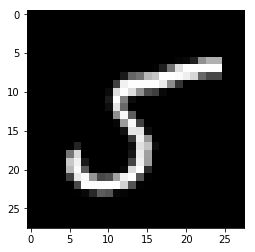

In [126]:
index = int(random.randrange(0,X.shape[1]))
plt.imshow(X[:, index].reshape((28,28)),cmap='gray')
plt.show()

# Relu, Sigmoid 

In [4]:
def relu(x):
    #r = np.maximum(x, 0, x)
    r = np.tanh(x)
    return r

def sigmoid(x):
    r = 1/(1 + np.exp(-x))
    return r

# Initializations

In [5]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*.01
    b1 = np.zeros((n_h, 1))
    w2 = np.random.randn(n_y, n_h)*.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1, 
        "b1" : b1, 
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

# Forward Propagation

In [6]:
def forward_prop(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = relu(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    
    cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return cache

# Cost Function

In [7]:
def cost_function(a2, y):
    m = X.shape[1]
    cost = -(1/m)*np.sum(y*np.log(a2) + (1-y)*np.log(1-a2))
    return cost

# Backward Propagation

In [8]:
def backward_prop(x, y, n_h, parameter, cache):
    
    m = x.shape[1]
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2'] 
    
    a1 = cache['a1']
    a2 = cache['a2']
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1 , keepdims = True)
    dz1 = (np.dot(w2.T, dz2))*(1 - np.power(a1, 2))
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    grads = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2, 
        "db2" : db2
    }
    
    return grads

# Update Parameters

In [9]:
def update_parameters(parameters, grads, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2'] 
    
    dw1 = grads['dw1']
    db1 = grads['db1']
    dw2 = grads['dw2']
    db2 = grads['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    Parameters = {
        "w1" : w1, 
        "b1" : b1, 
        "w2" : w2,
        "b2" : b2
    }
    
    return Parameters

# Model

In [21]:
def model(x, y, n_h, learning_rate, iterations):
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    parameters = initialize_parameters(n_x, n_h, n_y)
   
    for i in range(iterations+1):
        
        cache = forward_prop(X, parameters)
     
        cost = cost_function(cache['a2'], y)
        
        grads = backward_prop(X, y, n_h, parameters, cache)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        cost_list.append(cost)
        
        if i%(iterations/10) == 0 :
            print("cost after", i, "iters is" , cost)
    
    return parameters, cost_list

In [107]:
iterations = 500
starttime = time.time()
Parameters, Cost_list = model(X, Y, n_h = 1000, learning_rate = 0.03, iterations = iterations)
endtime = time.time()

times = endtime - starttime
mintimes = times/60
if times > 200 :
    print("\nTime taken for execution is %.2f" %mintimes,"minutes")
else:
    print("\nTime taken for execution is %.2f" %times,"seconds")

cost after 0 iters is 6.512044115132253
cost after 50 iters is 1.327251929406327
cost after 100 iters is 1.0578487060456983
cost after 150 iters is 0.9561188423277381
cost after 200 iters is 0.8580544401665398
cost after 250 iters is 0.8218696642084294
cost after 300 iters is 0.7709186048885803
cost after 350 iters is 0.7326632332985531
cost after 400 iters is 0.7007855583242687
cost after 450 iters is 0.6830083945381906

Time taken for execution is 96.56 minutes


# Ploting cost function

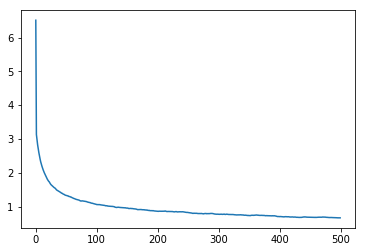

In [108]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.show()

# Accuracy

In [109]:
Cache = forward_prop(X, Parameters)
aprob = Cache['a2']
apred = aprob.max(0)
apred = apred.reshape(1, 1000)
ypred = []
for i in range(Y.shape[1]):
    for j in range(Y.shape[0]):
        if apred[:,i] == aprob[j][i]:
            ypred.append(j)
ypred = np.array(ypred).reshape(1,1000)

In [110]:
accuracy = np.mean(Yr.T == ypred)*100
print("Our accuracy is %.2f" %accuracy)

Our accuracy is 94.70


# For Test Dataset

In [113]:
X_t = np.loadtxt('test_X_350.csv', delimiter = ',').T
Y_t = np.loadtxt('test_label_350.csv', delimiter = ',')

In [116]:
Cache_test = forward_prop(X_t, Parameters)
aprob_t = Cache_test['a2']
apred_t = aprob_t.max(0)
apred_t = apred_t.reshape(1, aprob_t.shape[1])
ypred_t = []
for i in range(aprob_t.shape[1]):
    for j in range(aprob_t.shape[0]):
        if apred_t[:,i] == aprob_t[j][i]:
            ypred_t.append(j)
ypred_t = np.array(ypred_t).reshape(1,aprob_t.shape[1])

# Test Accuracy

In [117]:
accuracy_t = np.mean(Y_t.T == ypred_t)*100
print("Our accuracy is %.2f" %accuracy_t)

Our accuracy is 85.14


# Visualize our Prediction

Our Neural Network says, this is [4]


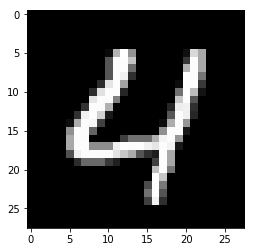

In [122]:
index = random.randrange(Y_t.shape[0])
print("Our Neural Network says, this is", ypred_t[:, index])
plt.imshow(X_t[:, index].reshape(28,28), cmap = 'gray')
plt.show()